# Monte Carlo Methods for Risk Management
---

Module 3 introduces two ways of accounting for risk in financial transactions: Value at Risk (VaR) and Credit Valuation Adjustment (CVA). The module begins by defining VaR and discusses how to calculate it using Monte-Carlo Methods. Examples of how to implement Monte Carlo Methods in Python for VaR simulation are provided. The module concludes by defining CVA and explaining how it can be calculated using the Black-Scholes model by Merton..

## 1.0 Value at Risk
---

**Introduction**

Risk is everywhere and, if you let it, has the potential to destroy a business. This is particularly the case in the financial sector where markets can move in unpredictable and unexpected ways. So, being able to manage risk is a very important skill for any individual in business, and even more so in the financial sector.

However, managing risk is more than sitting in a room and brainstorming what can go wrong. In order to truly manage it, we need techniques which allow us to introduce a degree of objectivity and consistency when identifying and quantifying the risk that the business or a project faces. The aim of this module will be to expose you to two popular methods for quantifying risk: Value at Risk (VaR) and Credit Valuation Adjustment (CVA).


**Risk Metrics**

A technique for quantifying the risk in a portfolio is known as a risk metric. This gives us a way of numerically describing the amount of uncertainty in that portfolio. Note that we will be talking about portfolios throughout this unit. A portfolio is just a group of assets.

A few examples of potential risk metrics include volatility (or variance) and correlation. These give an idea of the extent to which your portfolio's value could decrease, and how susceptible it is to massive swings in value. However, in order for them to fully characterize the risk inherent in the portfolio, you would need the distribution of returns to be multivariate normal, which is very unlikely. Thus, we would need to use a more general metric: Value at Risk.

### 1.0.1 Value at Risk (rename)
---

Value at Risk gives an indication of how much you stand to lose on a portfolio with a given probability, over a specific time period. This can be measured in absolute terms (we could lose $100 in portfolio value) or in relative terms (the value of our portfolio will decrease by 5%). Because of the possible usefulness of both measures, we will present both potential definitions (although they are linked regardless).

Now, let our current portfolio value be X(t). We can then define the return on our portfolio, until some fixed time T, as:

$$ R_{t,T} = \frac{X(T-t) - X(t)}{X(t)}$$

Note that the $\alpha$-quantile of a distribution, $x_\alpha$(t, T), is defined as:

$$ \mathbb{P}[R_{t,T} < x_\alpha(t,T) = \alpha$$

Thus, we can define VaR as being:

$$ VaR_\alpha(t,T) = $$

We can interpret VaR as being a quantile value: what values does the portfolio take on in the worst 5% of cases? We can also interpret this in terms of confidence intervals. We are
(1 - $\alpha$)-percent certain that the value of the portfolio will not fall below $VaR_\alpha(t, T)$.

Note that the definition of VaR is the negative of the quantile; this is an aesthetic definition so that the actual VaR value is positive.

For example, suppose we have a portfolio that is worth 100. Say we know that there is a 5% chance that the portfolio will have a value of 20 or less. Then the 5% VaR for the portfolio is 80, or 80%. We are 95% confident that the value of our portfolio will not fall by more than 80.

Note that there is a different VaR for different significance levels, and different time periods. It is very important to note that VaR changes when we change these quantities.



### 1.0.2 Expected Shortfall
---

Other names for this include conditional VaR or expected tail loss. Expected shortfall tells us how much we stand to lose assuming that our portfolio value does actually fall below our VaR. Put more simply, it is how much we stand to lose, on average, if we only consider the worst $\alpha$-percentile of cases

Conditional VaR is calculated as:

$$ EL_\alpha (t,T) = -\mathbb{E}[R_{t,T}|R_{t,T} < - VaR_\alpha (t,T)] \cdot X(t) $$

which is the negative of our expected return, given the expected return is less than the VaR, multiplied by the portfolio value. Note that this means that we are dealing with absolute terms, and not relative terms. We are, again, taking the negative for aesthetic reasons (and other sources may define the expected shortfall without the negative).

Another important note here is that, because we are looking at $R_{t,T}$ (the return of the distribution), the VaR value must also be in terms of the portfolio returns, and not the portfolio value.

## 1.1.0 Calculating VaR
---
Now that we know what VaR is, we will focus on how to actually calculate VaR. There are many ways to model VaR, so the methods we will present are not an exhaustive list. We will be focusing on the Monte Carlo class of VaR models and historical VaR simulation.

### 1.1.1 Monte Carlo VaR models
---

Monte Carlo VaR models make use of Monte Carlo methods to project asset values, in order to get some idea of what happens to your portfolio value in the future. In doing so, you will be able to build a distribution for your portfolio value. You can then use this distribution to estimate the α-percentile of the portfolio, and to estimate a VaR.

More explicitly, Monte Carlo VaR models work as follows:

- Determine dynamics for the assets in your portfolio.
- Use Monte Carlo simulation to simulate the value of these assets n-days into the future.
- Determine your portfolio value in each scenario.
- Determine the $\alpha$-quantile of these projected portfolio values.

### 1.1.2 Historical VaR models
---
One of the other popular methods to estimate VaR is historical simulation. This simulation process makes no parametric assumptions, and instead entirely uses data to project what may happen. For example, suppose we have three days worth of share data.
We can work out two days worth of returns for that share. If we then sample from these two returns, we can then project the value of our share one day into the future. In doing so, we are assuming that the company will be subject to similar conditions as it was in the past, so the past returns will be reflective of future returns. If we were to repeat this process several times (using significantly more data), we could apply a similar process as with Monte Carlo

VaR models in order to estimate VaR. Historical simulation works as follows:

- Source price data for the assets in the portfolio.
- Calculate the daily returns for all assets in the portfolio.
- Randomly sample n many log-returns and use these to grow the respective asset. values in the portfolio n-days into the future.
- Determine your portfolio value in each scenario.
- Determine the $\alpha$-quantile of these projected portfolio values.

**Which method is better?**

Each method comes with its own pros and cons. The historical method doesn't require any parametric assumptions regarding the returns of your assets; however, it does need a considerable amount of data to be applied. This may force you to use data from further into the past than you would be comfortable (arguably the most recent data would be a better reflection of the future asset performance). In fact, many regulators require that the data used for historical VaR calculations include periods of 'stress'. Thus, the firm may be forced to include data from high stress periods if the most recent data doesn't meet regulatory standards. This implies that the process of selecting appropriate data can be particularly difficult. Monte Carlo methods don't fall prey to this data history issue once you have calibrated your return model; but a model needs to be implied which immediately introduces model risk into your VaR estimate.

Historical simulation focuses on assessing what has happened in the past in order to determine the risk we face in the future. Monte Carlo simulation tries to find a balance between what has happened in the past, and what could potentially happen in the future. It makes use of models which can allow for events which haven't explicitly occurred before, and it also uses historical data to calibrate its model parameters, which allows for it to incorporate what has happened in the past into its estimates.

As is often the case, the best method would be problem specific. In fact, there will likely be legislature which requires a particular method for assessing VaR.

**Conditional tail VaR**

In the process of calculating VaR (in terms of the methods given in these notes), you will imply a distribution of portfolio values.
In order to determine Conditional Tail VaR, given that you have already determined the VaR, you would just need to work out the average value of the portfolio values which are less the VaR value.

## 2.0.0 Value at Risk in Python
---

The code in this unit is particularly dense. I would strongly recommend going through it with Jupyter Notebook open and checking each line as you go along. Being able to visualize the data helps significantly in terms of understanding what the code is trying to achieve.
### 2.0.1 Applying Monte Carlo VaR simulation in Python
---
The goal in this part of the notes will be to develop code for generating Monte Carlo estimates for the VaR.

The first thing to do is import all the libraries that we will use for this unit:

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
import random

from scipy.stats import norm, uniform

Now we need to set up all the relevant share information. These values were chosen just for this example. The code below creates column vectors for the initial share values, and the volatilities for each share. We also have a 3x3 correlation matrix, and a Cholesky decomposition of this matrix (saved as 'L').

General share information...

In [2]:
S0      = np.array([[100], [95], [50]])
sigma   = np.array([[0.15], [0.2], [0.3]])
cor_mat = np.array([[1, 0.2, 0.4], [0.2, 1, 0.8], [0.4, 0.8, 1]])

L = np.linalg.cholesky(cor_mat)
r = 0.1
T = 1

The output and shape of the S0 array...

In [3]:
S0 = np.array([[100], [95], [50]])
print(S0)
print('array shape = ', S0.shape)

[[100]
 [ 95]
 [ 50]]
array shape =  (3, 1)


The cor_mat array...

In [4]:
cor_mat

array([[1. , 0.2, 0.4],
       [0.2, 1. , 0.8],
       [0.4, 0.8, 1. ]])

and it's shape...

In [5]:
cor_mat.shape

(3, 3)

The Cholesky decomposition of this matrix...

In [6]:
L = np.linalg.cholesky(cor_mat)
L

array([[1.        , 0.        , 0.        ],
       [0.2       , 0.9797959 , 0.        ],
       [0.4       , 0.73484692, 0.54772256]])

Now we can set up information that is more relevant to our problem. We need to decide on our total number of simulations and the level of confidence for our VaR estimate.

Once this is done, we can calculate our initial portfolio value (assuming that we hold one unit of each of the three assets) as the sum of the current asset values.


In [7]:
np.random.seed(0)
t_simulations = 1000
alpha = 0.05

Current portfolio value...

In [8]:
portval_current = np.sum(S0)
portval_current

245

We then import our terminal share price function from the previous module...

In [9]:
def terminal_shareprice(S_0, risk_free_rate, sigma, z, T):
    return S_0 * np.exp((risk_free_rate - sigma**2/2) * T + sigma * np.sqrt(T) * z)

The next step is to simulate future share values and portfolio values (assuming that we keep our holdings constant). The “Z” variable is a correlated multivariate normal sample.

In [10]:
Z = np.matmul (L, norm.rvs(size = [3, t_simulations]))
print(Z.shape)
Z

(3, 1000)


array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.0941923 ,
        -1.14761094, -0.35811408],
       [ 0.89754042,  0.95447369, -0.21803474, ...,  0.17407129,
        -1.34835251, -1.35610621],
       [ 0.27455296, -0.1217901 ,  0.10642766, ...,  0.04871742,
        -1.96228935, -1.1507538 ]])

In [11]:
portval_future = np.sum(terminal_shareprice(S0, r, sigma, Z, T), axis=0)
portval_future.shape

(1000,)

We can now calculate the expected portfolio returns given our simulations. Before trying to calculate the VaR, it would make things significantly easier to sort this list. Otherwise, we would need to run some form of search algorithm to find the smallest portfolio returns. Lastly, we determine our VaR as the negative of the $\alpha$-quantile, where our $\alpha$ is 5%. We use the int function here because, when using matrix indexation, python can only index using integer values. The int function just makes sure that the script doesn't error out.

Calculating portfolio returns...

In [12]:
portreturn = (portval_future - portval_current) / portval_current
# portreturn

Sorting returns...

In [13]:
portreturn = np.sort(portreturn)
# portreturn

Determining VaR...

In [14]:
mVaR_estimate = -portreturn[int(np.floor(alpha * t_simulations)) - 1]
mVaR_estimate

0.14318361044360806

In [15]:
portreturn[49]

-0.14318361044360806

**Applying historical simulation to estimate VaR**

We now move on to estimating our VaR using historical simulation. 

Once again, we set up our preliminary information.

(code set up like this in notes. It'll break if run now as 'price_path not defined until later on)

In [16]:
random.seed(0)

t_simulations = 1000
alpha = 0.05

# hist_S0 = price_path[-1]
# hist_portval = np.sum(hist_S0)
# hist_portret = [None] * t_simulations

At this point, we would source historical share data. However, in this example we will rather generate our own. First, we need a function which produces a share price path. This
works in a similar way to our terminal share value function above; the big difference is that it keeps track of the share value on a daily basis. Note the use of the cumsum function within the share_path function.

This is a very convenient function which returns the sum of the elements in a matrix at that point in the matrix (so the first element of the resulting matrix will be the same as the original matrix, but the last element in the cumsum matrix will be the sum of the elements up until that point). This allows us to write share prices as being a function of the individual changes up until that point.


This code generates our price path. The price_path variable can be viewed as a synthetic version of the historical data that we would normally use.

In [31]:
import math
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
import random

from scipy.stats import norm, uniform

In [32]:
S0 = 25
sigma = 0.1
mu = 0.1
T = 1
alpha = 0.01

np.random.seed(0)
dT = 1/365

In [33]:
def share_path(S_0, risk_free_rate, sigma, Z, dT):
    return S_0 * np.exp(np.cumsum((risk_free_rate - sigma**2/2) * dT + sigma * np.sqrt(dT) * Z, 1))

In [34]:
Z_histdata = norm.rvs(size = [1, 10*365])
price_path = share_path(S0, mu, sigma, Z_histdata, dT)
price_path.shape
# print(price_path)

(1, 3650)

In [35]:
hist_lret = np.log(price_path[0, 1:]) - np.log(price_path[0, 0:-1])
# hist_lret.shape
# hist_lret

In [36]:
mc_mu = np.mean(hist_lret) * 365
mc_sigma = np.std(hist_lret) * np.sqrt(365)

In [0]:
def terminal_shareprice_adj(S_0, mu, sigma, Z, T):
    return S_0 * np.exp((mu) * T + sigma * np.sqrt(T) * Z)

In [0]:
alpha = 0.01
S0 = price_path[0, -1]
mportval_current = S0

mV_estimate    = [None] * 50
histV_estimate = [None] * 50
# S0

In [39]:
for i in range(1, 51):
    Z = norm.rvs(size = i * 1000)
    montportval_future = terminal_shareprice_adj(S0, mc_mu, mc_sigma, Z, T)
    hist_portret = [None] * i * 1000
    
    for j in range(1, i * 1000 + 1):
        rand_samp = uniform.rvs(size = 365) * (len(price_path[0]) - 1)
        rand_samp = [int(x) for x in rand_samp]
        share_returns = hist_lret[rand_samp]
        s_term = S0 * np.exp(np.sum(share_returns, axis = 0))
        hist_portret[j - i] = (s_term - mportval_current) / mportval_current
        
    montport_return  = np.sort((montportval_future - mportval_current) / mportval_current)
    hist_portret     = np.sort(hist_portret)
    
    mV_estimate[i-1] = -montport_return[int(alpha * i * 1000) - 1]
    histV_estimate[i-1] = -hist_portret[int(np.floor(alpha * i * 1000)) - 1]

In [26]:
np.mean(histV_estimate)

0.16470338889502079

Line 1 to Line 16 is essentially just pre-amble (they shouldn't be anything you haven't seen before). From lines 18 to 25, we implement code to generate synthetic historical data. More
detail on the mechanics for synthetic data generation can be found in the notes. In lines 31 to 33, we define an adjusted terminal share price function. The reason we need this is because we
will be using our historical returns to estimate the drift. When doing this, the average historical return is estimating the whole $ \mu - \frac{1}{2}\sigma^2$ and not just $\mu$, which is calculated in line 28. The adjusted terminal share price function accounts for this.

In line 36 we set our current share price to the latest value in our synthetic historical data, and in line 37 we set up the initial value of the portfolio as the current price of the share. This is assuming that we are holding one unit in the share.

Note that we will be working out VaR as a function of sample size for both methods. So, we pre- allocate space to store these values, which we do in lines 39 and 40. We also use our sample mean and volatility to project our share value. We do this so that our Monte Carlo and historical simulation estimates will be more similar. They will likely still differ slightly, however, because we will essentially be comparing a sample of returns against the mean return for the sample as a whole. These estimations happen in lines 28 and 29.

From Line 42 to 58, we loop through sample size and calculate VaR under both methods. Lines 43, 44, 54, and 57 are relevant to Monte Carlo simulation. The rest are relevant to historical simulation. The Monte Carlo unit samples from a random normal distribution, calculates the future portfolio value as the future share price, calculates the portfolio return, then calculates the VaR. The historical simulation parts are a bit more involved. The nested loop is necessary to generate a distribution for the future portfolio values through the historical simulation method. Briefly, we sample from a uniform distribution, use this sample to pick from our historical returns, use these returns to project our share price one year forward, and calculate the future portfolio value.

Finally, under both methods, we calculate the returns on these portfolios, work out the 1% quantile, and determine the Value at Risk. If we plot the results, we should get the following graph:

## 3.0 Credit Valuation Adjustment

Up until this point, we have been running our Monte Carlo simulations within a Black-Scholes framework. This has been useful because of the ease with which we can implement it; however, it does rely on some unrealistic assumptions. One of these is that there is no risk of default. In this set of notes, we will introduce the concept of credit risk, and give an overview of how it can be accounted for.

Definitions
When contracts are traded on an exchange, the exchange itself takes responsibility for ensuring that the parties receive the payments they are due. This is not the case for over-the-counter (OTC) contracts. For example, suppose you entered into an agreement for a company to buy an asset from you at some point in the future. If this company were to become bankrupt, you would miss out on any profit you were entitled to. This danger is known as counterparty credit risk. It is also often called default risk. We will use these two terms interchangeably. It is important to note that counterparty risk is faced by both parties in any transaction. In our above example, you could have insufficient funds to buy the asset to sell it to the company – in this case, they could lose out on profit. Since both parties are exposed to default risk, it is bilateral.

We now introduce a concept known as exposure. Your exposure at any time t is what you are at risk of losing, were the counterparty to default. It is the higher of the value of the portfolio and 0, i.e.


$$ E(t) = max(V(t), 0)$$

You can think of it this way: if your portfolio has a negative value (meaning you would owe the other party money), and they default, you don't lose out on any profit. If the value of the portfolio was positive and they defaulted, you would lose the value of the portfolio (the amount they owed you).

There are a number of further concepts which follow on from exposure:

- Current exposure, which is the exposure when 𝑡 is the current time,
- Expected exposure, which is what you predict the exposure to be at a future time 𝑡,
- Potential future exposure, which confidence level on exposure at some future time (this is very similar in concept to Value at Risk).

With these ideas of counterparty risk and exposure, we can now define credit valuation adjustments (CVA). CVA is calculated as the difference between the value of a portfolio which we assume is risk-free, and a portfolio where we account for default risk. As such, CVA can be thought of as the market value of the counterparty credit risk. As you might expect, the higher your exposure, the higher your CVA, since you stand to lose more.

For a mathematical definition of counterparty risk, we need to define two variables: $\delta$ and $\tau$. $\delta$ will be our recovery rate - this is the fraction of our portfolio that we would receive if the counterparty defaults. In other words, if our portfolio is worth V(t) at time t and the counterparty defaults at time t, we would only receive $\delta$V(t). So, we would lose (1 - $\delta$)V(t). Our second variable, $\tau$, is a stopping time. This will be the time that the counterparty defaults. If the counterparty never defaults, $\tau = \infty$. We only lose out if the counterparty defaults before the time we close-out our position with them. Our CVA is thus as follows:

$$CVA = \mathbb{E}^\mathbb{Q}[𝑒^{−r\tauτ}(1 - \delta)V(\tau)\mathbb{I}_{(\tau \leq T)}]$$

where r is our risk-free interest rate and 𝑇 is the close-out time for our portfolio. Let's go through each element in this expression.

- $\mathbb{E}^\mathbb{Q}$: we are calculated our expectation under the risk-neutral measure, as we always do for pricing.
- $e^{−r\tau}$: we are discounting our value to the present time.
- $1 - \delta$: this is the proportion of our portfolio that we lose if there is a default.
- $V(\tau)$: this is how much our portfolio is worth in total at the time of default
- $\mathbb{I}_{(\tau \leq T)}$: we only lose out if the counterparty defaults before we have closed-out our position with them.

The biggest issue we face with CVA is the difficulty in calculating it, as there are a number of factors which affect it, such as credit spreads and market factors. As a result, we introduce an extension to the Black-Scholes model, known as the Merton model.

**Merton model**

In order to account for the risk of default, we introduce the notion of firm value at time 𝑡. We keep all the assumptions which we had in the Black-Scholes model (besides for the no risk of default) and treat our firm value as an asset. This means it follows geometric Brownian motion and has the following SDE under the risk-neutral measure:

$$ dV_t = rV_t dt + \sigma V_t dW_t; V_t = V $$

() where V is the value of the firm at time t. We assume that the value of the firm is the maximum
amount which they can pay towards settling their debt. For the sake of modeling, we assume that the total debt which the firm has is some fixed amount, D, which is due at some future time T, and that default can only happen at time T. This means that, at time T, the debt holders receive

$$min(V_T, D) = D - (D - V_T )^+ $$

You'll notice that the positive-only portion, $(D - V_T )^+$, is the same payoff as a put on the firm value. The expected present value of the debt is thus equal to:

$$De^{-rT} - P(V, r, \sigma, D, T)$$

where $P(V, r, \sigma, D, T)$ is the Black-Scholes price for a put with initial asset value $V_0$ , risk-free rate r, volatility $\sigma$, strike D, and maturity T. Using our closed-form solution for the price of a put in Black-Scholes, we get:

$$ V_0\Phi(-d_1) + (1 - \Phi(-d_2))\cdot De^{-rT}$$

In this model, the probability of default is given by:

$$\mathbb{Q}[V_T < D]\,=\, \Phi(-d_2 )$$

These two formulas allow us to give values to the total debt of the firm. Now, let's consider the value of CVA for a particular portfolio. Suppose our portfolio has value $X_t$ at time t, where $X_t$ is some random variable with maturity time T. Now, implementing our assumption that default only happens at time T, our CVA given by equation (2) becomes:

$$ CVA = \mathbb{E}^\mathbb{Q}[e^{-rT}(1 - \delta)\cdot X_T\mathbb{I}_{\{\tau=T\}}] $$
<br>
$$ = \mathbb{E}^\mathbb{Q}[e^{-rT}(1 - \delta)\cdot X_T\mathbb{I}_{\{V_T < D|\}}] $$


If the value of our portfolio is independent of the value of the counter party firm, we can calculate this expectation as:

$$ (1 - \delta)\cdot\mathbb{E}^\mathbb{Q}[e^{-rT} X_T] \cdot \mathbb{Q}[V_T < D] = (1 - \delta)X_0 \Phi(-d_2)$$

which follows from the fact that discounted assets are martingales under the risk-neutral measure.

In the case of correlated portfolio values and firm values, we will need to resort to Monte Carlo methods. This will be done in the next unit, but we briefly introduce the concept of right way and wrong way risk. Wrong way risk is where, as the value of your portfolio increases relative to the counterparty, the likelihood of the counterparty defaulting increases. This means that the more you stand to gain, the more risk of default you face. Right way risk is simply the opposite: the more valuable your portfolio, the less likely the counterparty will default. The more negative this correlation, the more careful we have to be when performing our valuations.
In the next unit, we will be implementing the Monte Carlo algorithms for CVA. Refer back to these notes as necessary when doing the coding yourself.
 

## 4.0 CVA in Python
---

A number of the concepts introduced in the previous set of notes can be difficult to grasp at first. In this set of notes, we are going to be going through code that implements a Monte Carlo simulation for calculating CVA - this should help to make things a bit more concrete.

We are going to be considering the following scenario: you hold a call option on a stock, with an initial stock value of \\$100, a volatility of 30%, a strike of \\$110, and a term of one year. The continuously-compounded risk-free rate prevalent in the market is 10%. The counterparty to your call has some probability of default. The firm/counterparty is currently valued at \\$200, with a volatility of 25%, and has a debt of \\$180 which it owes in one year. If the firm were to default, you would receive 20% of what they owe you - this is their recovery rate.

We are going to be modeling your CVA for a number of different levels of correlation between the stock on which the option is written and the value of the counterparty. Let's go through the code that does this.


In [20]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

As per usual, we import the libraries necessary. Since we are working within the Merton model, we are going to be simulating our assets using a standard normal distribution – this is done in the same way as in the Black-Scholes model.

In [21]:
# market information
risk_free = 0.1

# share price information
S_0   = 100
sigma = 0.3

# call option information 
strike = 110
T = 1

# firm information
V_0  = 200
debt = 180
sigma_firm    = 0.25
recovery_rate = 0.2

Here we are capturing the information as per the problem statement. The share is the asset on which we hold a call option, and the firm is the counterparty for the option. The following function generates the terminal share price given some  random normal values, z.

In [22]:
def terminal_value(S_0, risk_free_rate, sigma, z, T):
    return S_0 * np.exp((risk_free_rate - sigma**2/2) * T + sigma * np.sqrt(T) * z)

Function for evaluating the call price in Monte Carlo Estimation...

In [23]:
def call_payoff(S_T, K):
    return np.maximum(S_T - K, 0)

It is necessary to create the functions which transform our random standard normals into terminal values. Note that we are going to be modeling our firm value in the same way which we have been modeling stock values - hence, we are going to be using the terminal_value function for both our stock and our firm. The call_payoff function finds the payoff for a call option at terminal time.

In [24]:
np.random.seed(0)

corr_tested   = np.linspace(-1, 1, 21)
cva_estimates = [None] * len(corr_tested)
cva_std       = [None] * len(corr_tested)

We set our seed so that we can easily compare our answers. Line 3 creates an array of the correlations we are going to be testing. Run this code and have a look at the array created – it has numbers from −1 to 1, going up in steps of 0.1.

In [25]:
corr_tested

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

For each correlation we test, we will have a CVA estimate and a CVA standard deviation.

In [26]:
for i in range(len(corr_tested)):
    
    correlation = corr_tested[i]
    if (correlation == 1 or correlation == -1):
        norm_vec_0 = norm.rvs(size = 50000)
        norm_vec_1 = correlation * norm_vec_0
        corr_norm_matrix = np.array([norm_vec_0, norm_vec_1])
        # print(corr_norm_matrix)
    else:
        corr_matrix = np.array([[1, correlation], [correlation, 1]])
        norm_matrix = norm.rvs(size = np.array([2, 50000]))
        corr_norm_matrix = np.matmul(np.linalg.cholesky(corr_matrix), norm_matrix)
        # print(corr_norm_matrix)
        
    term_stock_val = terminal_value(S_0, risk_free, sigma, corr_norm_matrix[0,], T)
    call_val       = call_payoff(term_stock_val, strike)
    term_firm_val  = terminal_value(V_0, risk_free, sigma_firm, corr_norm_matrix[1,], T)
    amount_lost    = np.exp(-risk_free * T) * (1 - recovery_rate) * (term_firm_val < debt) * call_val
    cva_estimates[i] = np.mean(amount_lost)
    cva_std[i] = np.std(amount_lost) / np.sqrt(50000)

# len(term_firm_val[term_firm_val < debt])
# len(call_vall[call_vall == 0])

In this loop we are running our Monte Carlo estimation. We are going to be using a sample size of 50 000 – this means that we have 50 000 estimates for our stock price and 50 000 estimates for our firm value. If our correlation is equal to 1 or -1, our standard normal numbers for each asset (the stock and the firm) are generated as follows:

- Generate 50 000 standard normal random variables,
- Take the vector of these standard normals and multiply them by the correlation, and
- Combine these two vectors into a matrix with each array making up a row.

Ensure that you understand why this works. Try a few smaller examples in your own code, and check the matrices generated.

If the correlation lies between -0.9 and 0.9 inclusive, we generate the correlated standard normal numbers using a Cholesky decomposition.

Once we have our matrix of standard normal random numbers, we can generate our terminal stock and firm values. Line 14 creates an array of stock values using the first row of the matrix of correlated standard normals. Note that this will create an array of 50 000 stock values. Line 16 creates an array of terminal firm values.

With these terminal values generated, we can calculate our lost profit in each case. Line 15 creates an array of call values for the given stock values. Line 17 using these call values in the formula:


$$ e^{-rT}(1-\delta)X_T\mathbb{I}_{\{V_T < D\}}$$

where X are the call values, V is the firm value, D is the debt of the firm, $\delta$ is the recovery rate, 
and r is the risk-free rate.

Our CVA estimate and standard deviation are calculated in the same way in which our usual Monte Carlo estimates are calculated. Before plotting our CVA estimates, we are going to calculate our CVA assuming that the correlation is 0.

Code to calculate default probability...

In [27]:
d_1 = (np.log(V_0 / debt) + (risk_free + sigma_firm**2/2) * T) / (sigma_firm * np.sqrt(T))
d_2 = d_1 - sigma_firm * np.sqrt(T)

default_prob = norm.cdf(-d_2)

This code calculates the probability of default, which is given by:

$$ \Phi(-d2) $$

In [28]:
d_1_stock = (np.log(S_0 / strike) + (risk_free + sigma**2/2) * T) / (sigma * np.sqrt(T))
d_2_stock = d_1_stock - sigma * np.sqrt(T)

analytic_callprice =  S_0 * norm.cdf(d_1_stock) - strike * np.exp(-risk_free * (T)) * norm.cdf(d_2_stock)

Here we have calculated our closed-form solution for the call option on the share, as per our usual Black-Scholes formula.

In [29]:
uncorr_cva = (1 - recovery_rate) * default_prob * analytic_callprice

We are finally able to compute our CVA assuming 0 correlation. We use the formula given by: 

$$(1 - \delta)X_0\cdot \Phi(-d_2)$$

where $X_0$ is the closed-form solution to the price of the call.


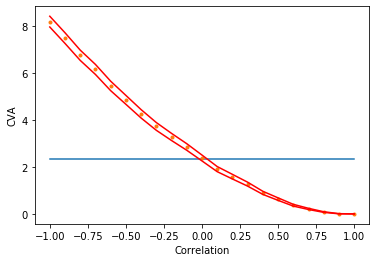

In [30]:
plt.plot(corr_tested, [uncorr_cva] * 21)
plt.plot(corr_tested, cva_estimates, '.')
plt.plot(corr_tested, cva_estimates + (3 * np.array(cva_std)), 'r')
plt.plot(corr_tested, cva_estimates - (3 * np.array(cva_std)), 'r')
plt.xlabel('Correlation')
plt.ylabel('CVA')
plt.show()

Finally, we plot our Monte Carlo CVA estimates for different correlations, alongside three standard deviation error bounds and the 0 correlation CVA. If you have implemented your code properly, your plot should look like the one in Figure 2.